# Stack Overflow Developer Survey 2017

In [1]:
from io import BytesIO
from zipfile import ZipFile
import requests

def get_zip(file_url):
    url = requests.get(file_url)
    zipfile = ZipFile(BytesIO(url.content))
    zip_names = zipfile.namelist()
    if len(zip_names) == 1:
        file_name = zip_names.pop()
        extracted_file = zipfile.open(file_name)
        return extracted_file

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

pd.set_option('display.large_repr', 'truncate')
pd.set_option('display.max_columns', 159)
pd.set_option('display.max_rows', 159)

print ('pandas: ',pd.__version__, '\npython: ', sys.version)

pandas:  0.19.2 
python:  3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]


## Data import and quick eyeball over our data

In [5]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM')

# df = pd.read_csv(filepath_or_buffer='data/developer_survey_2017/survey_results_public.csv')
# dfSchema = pd.read_csv(filepath_or_buffer='data/developer_survey_2017/survey_results_schema.csv')

In [32]:
df.head(10)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [35]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [47]:
dfSchema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


# Exercises
Lets dig into data set to find answers for following questions:
    <ol>
        <li>Which are 5 countries that pay best</li>
        <li>Are full-time devs who answered strongly/somewhat/agree in 29.ProblemSovling question, are earning more than those who answered differently?</li>
        <li>What is TOP3 most common programming languages for each type of projects (web/mobile/software/...) and also which type pays best</li>
        <li>ProblemSolving vs BuildingThings</li>
        <li>find out how many different developer types are</li>
        <li></li>
    </ol>

### 1. How many different developer types are there?
Lets eyeball the data in column DeveloperType

In [242]:
df.DeveloperType.head(20)

0                                                   NaN
1                                                   NaN
2                                                 Other
3                                                   NaN
4     Mobile developer; Graphics programming; Deskto...
5                                                   NaN
6                                                   NaN
7                                         Web developer
8                       Web developer; Mobile developer
9      Mobile developer; Desktop applications developer
10                                                  NaN
11                                        Web developer
12                                                  NaN
13                                        Web developer
14              Embedded applications/devices developer
15                       Desktop applications developer
16                                        Web developer
17    Web developer; Embedded applications/devic

We have following mix of values:
<ul>
<li>NaN</li>
<li>Single developer type (no extra characters)</li>
<li>Multiple developer types seperated with semicolon</li>
</ul>

What we wanna do is:
<li>drop all NaN values form DataFrame</li>

In [4]:
df.DeveloperType.dropna().head(10)

2                                                 Other
4     Mobile developer; Graphics programming; Deskto...
7                                         Web developer
8                       Web developer; Mobile developer
9      Mobile developer; Desktop applications developer
11                                        Web developer
13                                        Web developer
14              Embedded applications/devices developer
15                       Desktop applications developer
16                                        Web developer
Name: DeveloperType, dtype: object

<li>convert it to string in order to split values of case #3 (multiple dev types). This will spawn pd.Series</li>
<li>convert Series to list</li>

In [10]:
for x in range(10):
    print (df.DeveloperType.dropna().str.split('; ').tolist()[x]) # let's print results

['Other']
['Mobile developer', 'Graphics programming', 'Desktop applications developer']
['Web developer']
['Web developer', 'Mobile developer']
['Mobile developer', 'Desktop applications developer']
['Web developer']
['Web developer']
['Embedded applications/devices developer']
['Desktop applications developer']
['Web developer']


<li>itterate over list in order to extract each element from nested lists</li>

In [15]:
result = []
extend = result.extend
for i in df.DeveloperType.dropna().str.split('; ').tolist() : extend(i)

for x in range(10) : print (result[x]) # let's print results

Other
Mobile developer
Graphics programming
Desktop applications developer
Web developer
Web developer
Mobile developer
Mobile developer
Desktop applications developer
Web developer


Count value occurances in list 

In [30]:
final_data = pd.Series(result).value_counts(sort=True, ascending=True)
final_data

Quality assurance engineer                                1252
Machine learning specialist                               1379
Graphic designer                                          1426
Graphics programming                                      1731
Other                                                     2694
Data scientist                                            3045
Embedded applications/devices developer                   3352
DevOps specialist                                         4015
Systems administrator                                     4086
Developer with a statistics or mathematics background     4091
Database administrator                                    5192
Mobile developer                                          8326
Desktop applications developer                           10435
Web developer                                            26235
dtype: int64

And go visiual

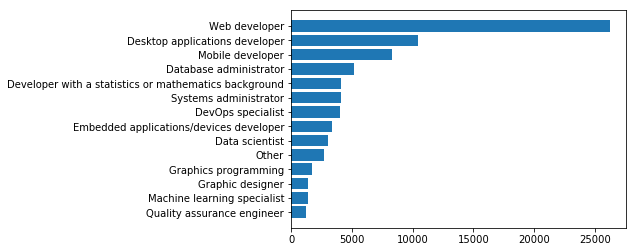

In [31]:
# without ascending=true: plt.barh(range(len(final_data)) , final_data.iloc[::-1], tick_label=final_data.index[::-1])
plt.barh(range(len(final_data)) , final_data, tick_label=final_data.index)
plt.show()

### 2. Salaries, Job/Career satisfaction for each developer type

### 3. Compare Salaries, Job/Career satisfaction for full-time devs, which dont like building things or problem sovling vs these who do like it

### 4. Which profession is most satysfying for developers who would like to change the world

### 5. Which are 10 countries that pay best

First of all, we wanna grab data only from countries for which we have at least 10 data points.

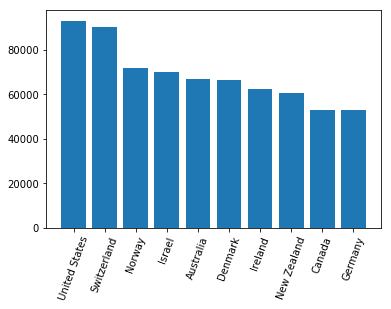

In [245]:
countries = df[(df.Professional=='Professional developer') | (df.Professional.str.contains('Professional non-developer'))]\
            .groupby('Country')['Salary'].count() > 10 
    
countries = countries[countries == True].index.tolist()

data = df[((df.Professional=='Professional developer') | (df.Professional.str.contains('Professional non-developer'))) & df['Country'].isin(countries) ]\
        .groupby('Country')['Salary'].median().nlargest(10).astype(int)

plt.bar(range(len(data)), data, tick_label=data.index)
# plt.ticklabel_format()
# plt.tick_params(direction='out', length=6, width=2, colors='r')
plt.xticks(rotation=70)
# plt.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
plt.show()

In [22]:
df.groupby('Country')['Salary'].get_group('Poland').median()



19753.0864197531

In [17]:
data = df.groupby('Country')
countries = data['Salary'].count() > 5
countries = countries[countries == True].index.tolist()
data[data.Country.isin(countries)].median().nlargest(10)


# data = df[((df.Professional=='Professional developer') | (df.Professional.str.contains('Professional non-developer'))) & df['Country'].isin(countries) ]\
#         .groupby('Country')['Salary'].median().nlargest(10).astype(int)

# plt.bar(range(len(data)), data, tick_label=data.index)
# plt.xticks(rotation=70)
# plt.show()

AttributeError: Cannot access callable attribute 'isin' of 'SeriesGroupBy' objects, try using the 'apply' method

In [20]:
pd.Series.value_counts??


Object `reduce` not found.
